In [2]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import matplotlib.pyplot as plt

import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# 나눔 폰트를 사용합니다.
import matplotlib 

matplotlib.rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

from pathlib import Path
import os

GRAPHS_PATH = Path(os.getcwd()).resolve().parent.parent.joinpath("data", "graphs","ch_11")
GRAPHS_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = GRAPHS_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

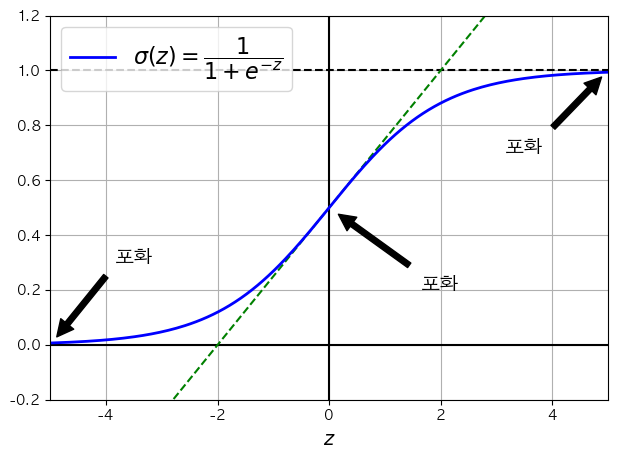

In [4]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2, label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")

props = dict(facecolor='black', shrink=0.1)
plt.annotate('포화', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha='center')
plt.annotate('포화', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha='center')
plt.annotate('포화', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha='center')
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)

save_fig("sigmoid_saturation_plot")
plt.show()

In [7]:
dense = tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")

he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")
dense = tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer=he_avg_init)

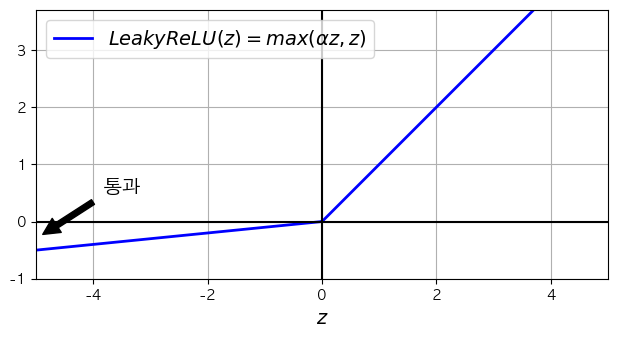

In [8]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('통과', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props, fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

save_fig("leaky_relu_plot")
plt.show()

In [9]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)
dense = tf.keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(alpha=0.2),
])

2023-11-17 15:13:58.363530: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-11-17 15:13:58.363572: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-17 15:13:58.363585: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-17 15:13:58.363633: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-17 15:13:58.363652: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
dense = tf.keras.layers.Dense(50, activation="elu", kernel_initializer="he_normal")

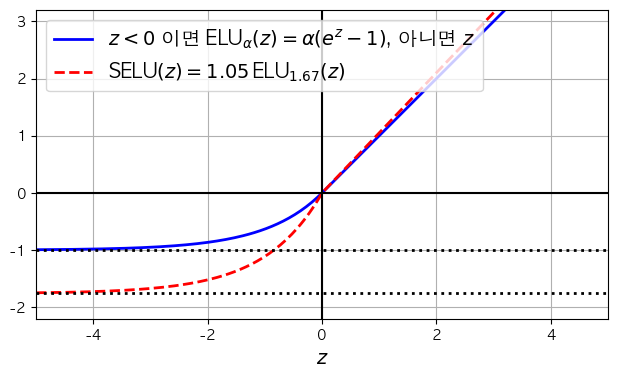

In [12]:
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2, label=r"$z < 0$ 이면 ELU$_\alpha(z) = \alpha (e^z - 1)$, 아니면 $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

save_fig("elu_selu_plot")
plt.show()

In [13]:
dense = tf.keras.layers.Dense(50, activation="selu",
                              kernel_initializer="lecun_normal")

In [20]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

In [22]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [23]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [24]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5


2023-11-17 15:27:04.391736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-11-17 15:27:04.731861: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1719/1719 [==============================] - 278s 160ms/step - loss: 1.2113 - accuracy: 0.5415 - val_loss: 0.7935 - val_accuracy: 0.7228
Epoch 2/5
1719/1719 [==============================] - 276s 160ms/step - loss: 0.7174 - accuracy: 0.7453 - val_loss: 0.6164 - val_accuracy: 0.7814
Epoch 3/5
1719/1719 [==============================] - 276s 161ms/step - loss: 0.5911 - accuracy: 0.7915 - val_loss: 0.5734 - val_accuracy: 0.8068
Epoch 4/5
1719/1719 [==============================] - 275s 160ms/step - loss: 0.5313 - accuracy: 0.8167 - val_loss: 0.5116 - val_accuracy: 0.8274
Epoch 5/5
1719/1719 [==============================] - 275s 160ms/step - loss: 0.4848 - accuracy: 0.8316 - val_loss: 0.5060 - val_accuracy: 0.8304


In [25]:
tf.random.set_seed(42)

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [27]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5


2023-11-17 15:56:57.967682: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1719/1719 [==============================] - 79s 44ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1042
Epoch 2/5
1719/1719 [==============================] - 73s 42ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 3/5
1719/1719 [==============================] - 74s 43ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 4/5
1719/1719 [==============================] - 74s 43ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 5/5
1719/1719 [==============================] - 74s 43ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042


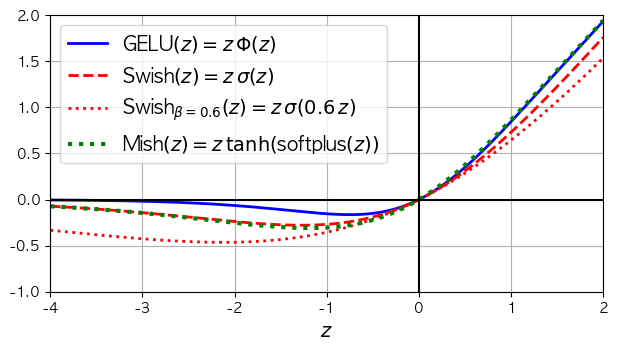

In [28]:
# 추가 코드 - 이 셀은 그림 11-4를 생성하고 저장합니다.

def swish(z, beta=1):
    return z * sigmoid(beta * z)

def approx_gelu(z):
    return swish(z, beta=1.702)

def softplus(z):
    return np.log(1 + np.exp(z))

def mish(z):
    return z * np.tanh(softplus(z))

z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

save_fig("gelu_swish_mish_plot")
plt.show()

In [29]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)               4

In [31]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [32]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics="accuracy")
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 21s 11ms/step - loss: 0.6794 - accuracy: 0.7685 - val_loss: 0.5068 - val_accuracy: 0.8208
Epoch 2/2
1719/1719 [==============================] - 19s 11ms/step - loss: 0.5326 - accuracy: 0.8167 - val_loss: 0.4649 - val_accuracy: 0.8336


In [33]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics="accuracy")
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 17s 10ms/step - loss: 0.6010 - accuracy: 0.7986 - val_loss: 0.4302 - val_accuracy: 0.8486
Epoch 2/2
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4234 - accuracy: 0.8529 - val_loss: 0.3750 - val_accuracy: 0.8634


In [38]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

In [41]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

In [43]:
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8, activation="softmax")
])

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A")



Epoch 1/20


2023-11-17 16:20:14.453272: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1376/1376 [==============================] - 9s 6ms/step - loss: 1.1699 - accuracy: 0.5765 - val_loss: 0.7113 - val_accuracy: 0.7445
Epoch 2/20
1376/1376 [==============================] - 8s 6ms/step - loss: 0.6182 - accuracy: 0.7827 - val_loss: 0.5458 - val_accuracy: 0.8090
Epoch 3/20
1376/1376 [==============================] - 8s 6ms/step - loss: 0.5114 - accuracy: 0.8262 - val_loss: 0.4789 - val_accuracy: 0.8353
Epoch 4/20
1376/1376 [==============================] - 8s 6ms/step - loss: 0.4580 - accuracy: 0.8448 - val_loss: 0.4374 - val_accuracy: 0.8508
Epoch 5/20
1376/1376 [==============================] - 8s 6ms/step - loss: 0.4246 - accuracy: 0.8559 - val_loss: 0.4115 - val_accuracy: 0.8576
Epoch 6/20
1376/1376 [==============================] - 8s 6ms/step - loss: 0.4009 - accuracy: 0.8638 - val_loss: 0.3934 - val_accuracy: 0.8621
Epoch 7/20
1376/1376 [==============================] - 8s 6ms/step - loss: 0.3838 - accuracy: 0.8686 - val_loss: 0.3807 - val_accuracy: 0.8624
Epo

INFO:tensorflow:Assets written to: my_model_A/assets


In [44]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="sigmoid")   
])

model_B.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))
model_B.evaluate(X_test_B, y_test_B)

Epoch 1/20


2023-11-17 16:23:29.643022: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


7/7 [==============================] - 2s 116ms/step - loss: 1.2596 - accuracy: 0.1950 - val_loss: 1.1700 - val_accuracy: 0.1978
Epoch 2/20
7/7 [==============================] - 0s 27ms/step - loss: 1.1907 - accuracy: 0.1650 - val_loss: 1.1094 - val_accuracy: 0.2008
Epoch 3/20
7/7 [==============================] - 0s 26ms/step - loss: 1.1392 - accuracy: 0.1750 - val_loss: 1.0722 - val_accuracy: 0.2364
Epoch 4/20
7/7 [==============================] - 0s 25ms/step - loss: 1.0758 - accuracy: 0.2100 - val_loss: 1.0237 - val_accuracy: 0.2582
Epoch 5/20
7/7 [==============================] - 0s 24ms/step - loss: 1.0322 - accuracy: 0.2150 - val_loss: 0.9717 - val_accuracy: 0.2582
Epoch 6/20
7/7 [==============================] - 0s 24ms/step - loss: 0.9828 - accuracy: 0.2400 - val_loss: 0.9272 - val_accuracy: 0.2809
Epoch 7/20
7/7 [==============================] - 0s 32ms/step - loss: 0.9378 - accuracy: 0.2750 - val_loss: 0.8876 - val_accuracy: 0.2928
Epoch 8/20
7/7 [=====================

[0.5160110592842102, 0.8125]

In [46]:
model_a = tf.keras.models.load_model("my_model_A")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [47]:
tf.random.set_seed(42)

In [49]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [50]:
# 추가 코드 - 이전 셀에서와 마찬가지로 model_B_on_A를 생성합니다.
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [51]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])

In [52]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
1/7 [===>..........................] - ETA: 1s - loss: 3.0749 - accuracy: 0.3750

2023-11-17 16:28:44.174492: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


7/7 [==============================] - 1s 67ms/step - loss: 1.8769 - accuracy: 0.4450 - val_loss: 0.9736 - val_accuracy: 0.5242
Epoch 2/4
7/7 [==============================] - 0s 26ms/step - loss: 0.6863 - accuracy: 0.6000 - val_loss: 0.4904 - val_accuracy: 0.7873
Epoch 3/4
7/7 [==============================] - 0s 34ms/step - loss: 0.4387 - accuracy: 0.8500 - val_loss: 0.4385 - val_accuracy: 0.8546
Epoch 4/4
7/7 [==============================] - 0s 34ms/step - loss: 0.4155 - accuracy: 0.8600 - val_loss: 0.4305 - val_accuracy: 0.8546


Epoch 1/16
7/7 [==============================] - 1s 76ms/step - loss: 0.4095 - accuracy: 0.8450 - val_loss: 0.4383 - val_accuracy: 0.8437
Epoch 2/16
7/7 [==============================] - 0s 28ms/step - loss: 0.3988 - accuracy: 0.8500 - val_loss: 0.4075 - val_accuracy: 0.8734
Epoch 3/16
7/7 [==============================] - 0s 25ms/step - loss: 0.3795 - accuracy: 0.8600 - val_loss: 0.3924 - val_accuracy: 0.8714
Epoch 4/16
7/7 [==============================] - 0s 32ms/step - loss: 0.3693 - accuracy: 0.8750 - val_loss: 0.3830 - val_accuracy: 0.8793
Epoch 5/16
7/7 [==============================] - 0s 27ms/step - loss: 0.3608 - accuracy: 0.8850 - val_loss: 0.3763 - val_accuracy: 0.8872
Epoch 6/16
7/7 [==============================] - 0s 32ms/step - loss: 0.3523 - accuracy: 0.8800 - val_loss: 0.3696 - val_accuracy: 0.8892
Epoch 7/16
7/7 [==============================] - 0s 26ms/step - loss: 0.3418 - accuracy: 0.8900 - val_loss: 0.3872 - val_accuracy: 0.8675
Epoch 8/16
7/7 [===========

In [53]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.9035


[0.30943354964256287, 0.9035000205039978]

In [54]:
1 - (100 - 90.35) / (100 - 81.25)

0.48533333333333306

In [56]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

In [57]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [58]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10


2023-11-20 08:37:19.777588: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1719/1719 [==============================] - 10s 5ms/step - loss: 0.7267 - accuracy: 0.7449 - val_loss: 0.5321 - val_accuracy: 0.8066
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5186 - accuracy: 0.8187 - val_loss: 0.5039 - val_accuracy: 0.8138
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4874 - accuracy: 0.8289 - val_loss: 0.4725 - val_accuracy: 0.8326
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4792 - accuracy: 0.8334 - val_loss: 0.4491 - val_accuracy: 0.8356
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5011 - accuracy: 0.8291 - val_loss: 0.4872 - val_accuracy: 0.8220
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7456 - accuracy: 0.8016 - val_loss: 1.2581 - val_accuracy: 0.7468
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 2.5573 - accuracy: 0.7505 - val_loss: 3.2595 - val_accuracy: 0.7512
E

In [59]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

history_momentum = build_and_train_model(optimizer)

Epoch 1/10
  18/1719 [..............................] - ETA: 10s - loss: 2.6775 - accuracy: 0.1667

2023-11-20 08:39:01.359732: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.7260 - accuracy: 0.7437 - val_loss: 0.5181 - val_accuracy: 0.8164
Epoch 2/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.5155 - accuracy: 0.8197 - val_loss: 0.4879 - val_accuracy: 0.8242
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4898 - accuracy: 0.8276 - val_loss: 0.4869 - val_accuracy: 0.8332
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4910 - accuracy: 0.8303 - val_loss: 0.4475 - val_accuracy: 0.8420
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5509 - accuracy: 0.8179 - val_loss: 0.6070 - val_accuracy: 0.8158
Epoch 6/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.9279 - accuracy: 0.7881 - val_loss: 1.8445 - val_accuracy: 0.7670
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 3.6671 - accuracy: 0.7394 - val_loss: 10.8265 - val_accuracy: 0.6934
E

In [60]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
   1/1719 [..............................] - ETA: 9:24 - loss: 4.1508 - accuracy: 0.0938

2023-11-20 08:40:51.163489: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.7100 - accuracy: 0.7540 - val_loss: 0.5356 - val_accuracy: 0.8112
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5110 - accuracy: 0.8213 - val_loss: 0.4973 - val_accuracy: 0.8216
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4807 - accuracy: 0.8321 - val_loss: 0.4660 - val_accuracy: 0.8350
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4710 - accuracy: 0.8370 - val_loss: 0.4479 - val_accuracy: 0.8398
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4780 - accuracy: 0.8339 - val_loss: 0.4703 - val_accuracy: 0.8340
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6499 - accuracy: 0.8112 - val_loss: 1.6267 - val_accuracy: 0.7422
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 14.3046 - accuracy: 0.6990 - val_loss: 87.3519 - val_accuracy: 0.5918

In [62]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
   8/1719 [..............................] - ETA: 13s - loss: 2.8973 - accuracy: 0.1914 

2023-11-20 08:44:47.385257: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adagrad/AssignAddVariableOp.


1719/1719 [==============================] - 11s 6ms/step - loss: 1.0365 - accuracy: 0.6469 - val_loss: 0.7203 - val_accuracy: 0.7452
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6876 - accuracy: 0.7577 - val_loss: 0.6248 - val_accuracy: 0.7748
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6205 - accuracy: 0.7833 - val_loss: 0.5802 - val_accuracy: 0.7980
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5850 - accuracy: 0.7980 - val_loss: 0.5562 - val_accuracy: 0.8074
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5616 - accuracy: 0.8070 - val_loss: 0.5372 - val_accuracy: 0.8116
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5446 - accuracy: 0.8116 - val_loss: 0.5243 - val_accuracy: 0.8148
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5316 - accuracy: 0.8175 - val_loss: 0.5127 - val_accuracy: 0.8190
E

In [63]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 17s 9ms/step - loss: 0.8700 - accuracy: 0.7436 - val_loss: 1.5645 - val_accuracy: 0.7514
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 4.7234 - accuracy: 0.6939 - val_loss: 10.6273 - val_accuracy: 0.6208
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 27.9991 - accuracy: 0.6288 - val_loss: 56.6407 - val_accuracy: 0.5672
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 101.8635 - accuracy: 0.5923 - val_loss: 121.5095 - val_accuracy: 0.6342
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 266.4139 - accuracy: 0.5737 - val_loss: 450.9622 - val_accuracy: 0.5816
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 578.3450 - accuracy: 0.5601 - val_loss: 753.1802 - val_accuracy: 0.5400
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 1096.6473 - accuracy: 0.5445 - val_los

In [67]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

history_adam = build_and_train_model(optimizer)

Epoch 1/10


2023-11-20 08:57:25.917971: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


1719/1719 [==============================] - 11s 6ms/step - loss: 0.9404 - accuracy: 0.7493 - val_loss: 1.7307 - val_accuracy: 0.7340
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 31.5762 - accuracy: 0.6423 - val_loss: 55.5578 - val_accuracy: 0.6566
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 167.8396 - accuracy: 0.6044 - val_loss: 243.6637 - val_accuracy: 0.5898
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 464.8553 - accuracy: 0.5855 - val_loss: 728.9918 - val_accuracy: 0.4858
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 907.1861 - accuracy: 0.5752 - val_loss: 930.2904 - val_accuracy: 0.6214
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 1603.2286 - accuracy: 0.5637 - val_loss: 1038.6462 - val_accuracy: 0.6262
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2463.0115 - accuracy: 0.5624 - val_loss: 275

In [68]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,
                                       beta_2=0.999)

history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.6288 - accuracy: 0.7805 - val_loss: 0.5164 - val_accuracy: 0.8092
Epoch 2/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.5019 - accuracy: 0.8268 - val_loss: 0.5011 - val_accuracy: 0.8182
Epoch 3/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.5315 - accuracy: 0.8229 - val_loss: 0.6850 - val_accuracy: 0.8068
Epoch 4/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.6841 - accuracy: 0.8022 - val_loss: 0.8577 - val_accuracy: 0.7386
Epoch 5/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.9407 - accuracy: 0.7779 - val_loss: 0.9745 - val_accuracy: 0.7608
Epoch 6/10
1719/1719 [==============================] - 20s 12ms/step - loss: 1.5850 - accuracy: 0.7439 - val_loss: 1.8318 - val_accuracy: 0.7446
Epoch 7/10
1719/1719 [==============================] - 19s 11ms/step - loss: 2.6220 - accuracy: 0.7083 - val_loss: 2.1139 -

In [69]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,
                                       beta_2=0.999)

history_nadam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 41s 23ms/step - loss: 0.6988 - accuracy: 0.7829 - val_loss: 1.2651 - val_accuracy: 0.7344
Epoch 2/10
1719/1719 [==============================] - 40s 23ms/step - loss: 10.4729 - accuracy: 0.6819 - val_loss: 38.0257 - val_accuracy: 0.5748
Epoch 3/10
1719/1719 [==============================] - 40s 23ms/step - loss: 70.1047 - accuracy: 0.6053 - val_loss: 96.2442 - val_accuracy: 0.6190
Epoch 4/10
1719/1719 [==============================] - 40s 23ms/step - loss: 207.7563 - accuracy: 0.5709 - val_loss: 213.3303 - val_accuracy: 0.5744
Epoch 5/10
1719/1719 [==============================] - 40s 23ms/step - loss: 494.3209 - accuracy: 0.5340 - val_loss: 1238.8848 - val_accuracy: 0.4932
Epoch 6/10
1719/1719 [==============================] - 41s 24ms/step - loss: 1035.1847 - accuracy: 0.5045 - val_loss: 1527.2173 - val_accuracy: 0.4320
Epoch 7/10
1719/1719 [==============================] - 38s 22ms/step - loss: 2121.3733 - accuracy: 0.469

In [74]:
import tensorflow_addons as tfa

optimizer = tfa.optimizers.AdamW(weight_decay=1e-5, learning_rate=0.001,
                                 beta_1=0.9, beta_2=0.999)

history_adamw = build_and_train_model(optimizer)

/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not 

Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 1.2626 - accuracy: 0.7362 - val_loss: 2.6914 - val_accuracy: 0.7562
Epoch 2/10
1719/1719 [==============================] - 11s 7ms/step - loss: 23.7483 - accuracy: 0.6453 - val_loss: 64.2584 - val_accuracy: 0.5998
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 153.1802 - accuracy: 0.5629 - val_loss: 221.6910 - val_accuracy: 0.5304
Epoch 4/10
1719/1719 [==============================] - 11s 7ms/step - loss: 423.1850 - accuracy: 0.5349 - val_loss: 414.4940 - val_accuracy: 0.5260
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 868.7619 - accuracy: 0.5213 - val_loss: 1037.4794 - val_accuracy: 0.4482
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1557.9965 - accuracy: 0.5068 - val_loss: 1749.6403 - val_accuracy: 0.4904
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 2571.2021 - accuracy: 0.4936 - v

In [73]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 93.2 MB/s eta 0:00:00a 0:00:01


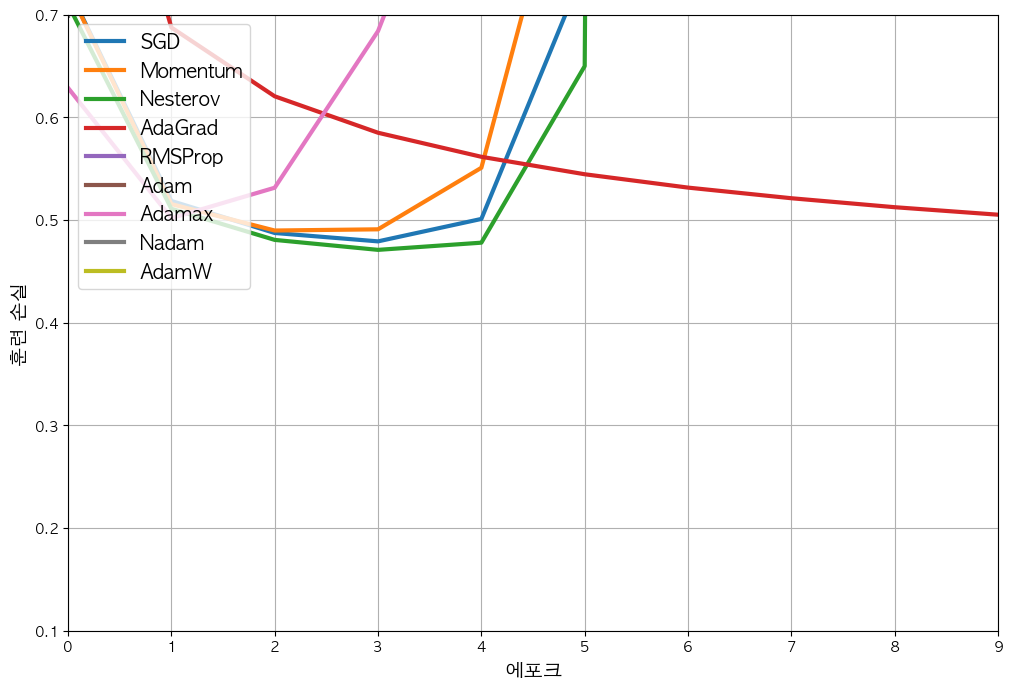

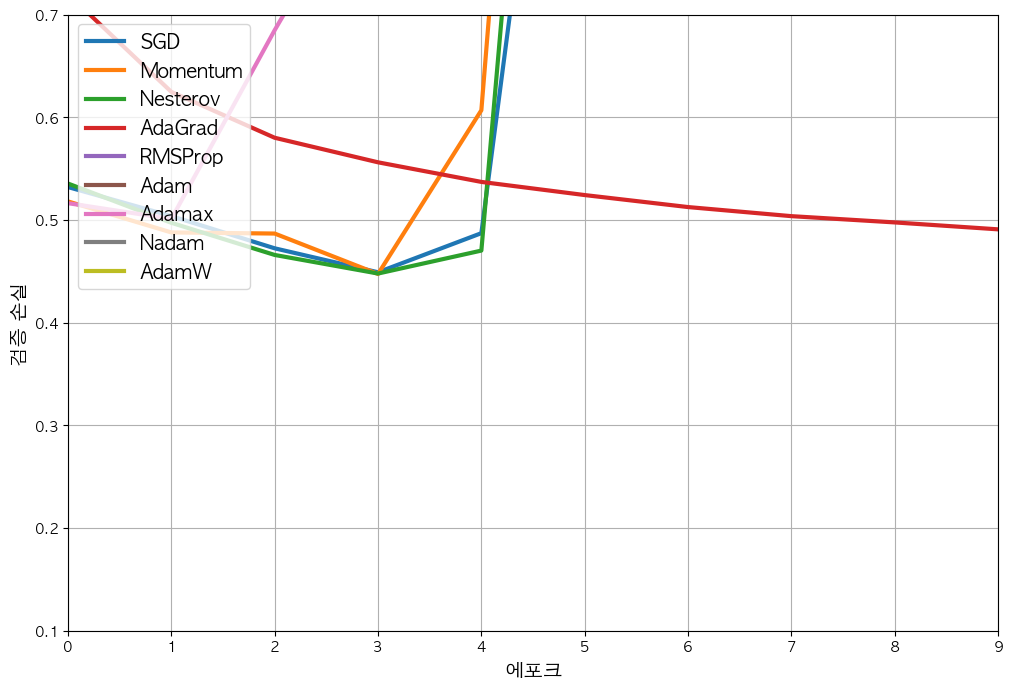

In [76]:
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam, history_adamw),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)
    
    plt.grid()
    plt.xlabel("에포크")
    plt.ylabel({"loss": "훈련 손실", "val_loss": "검증 손실"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

In [77]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, weight_decay=1e-4)

history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7151 - accuracy: 0.7460 - val_loss: 0.5402 - val_accuracy: 0.8080
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.5247 - accuracy: 0.8159 - val_loss: 0.5058 - val_accuracy: 0.8208
Epoch 3/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5006 - accuracy: 0.8242 - val_loss: 0.4980 - val_accuracy: 0.8290
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5497 - accuracy: 0.8150 - val_loss: 0.5177 - val_accuracy: 0.8252
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7862 - accuracy: 0.7919 - val_loss: 0.8883 - val_accuracy: 0.7906
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 1.7445 - accuracy: 0.7605 - val_loss: 4.5834 - val_accuracy: 0.6874
Epoch 7/10
1719/1719 [==============================] - 13s 8ms/step - loss: 9.8994 - accuracy: 0.7017 - val_loss: 28.8296 - val_a

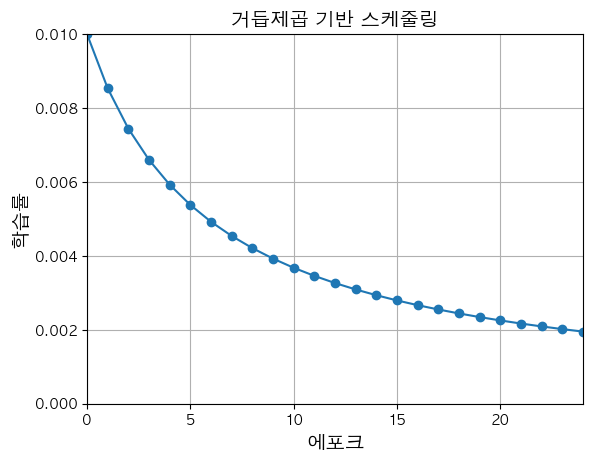

In [79]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
n_epochs = 25

epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs, "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("에포크")
plt.ylabel("학습률")
plt.title("거듭제곱 기반 스케줄링", fontsize=14)
plt.grid(True)
plt.show()

In [80]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch / 20)

In [81]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [82]:
tf.random.set_seed(42)
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
   8/1719 [..............................] - ETA: 12s - loss: 2.3604 - accuracy: 0.1914 

2023-11-20 09:15:32.332050: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.7068 - accuracy: 0.7486 - val_loss: 0.5151 - val_accuracy: 0.8190 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5154 - accuracy: 0.8195 - val_loss: 0.4874 - val_accuracy: 0.8224 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4819 - accuracy: 0.8306 - val_loss: 0.4613 - val_accuracy: 0.8382 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4690 - accuracy: 0.8361 - val_loss: 0.4460 - val_accuracy: 0.8452 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4602 - accuracy: 0.8393 - val_loss: 0.4597 - val_accuracy: 0.8352 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4568 - accuracy: 0.8404 - val_loss: 0.4839 - val_accuracy: 0.8330 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 10s 6ms/

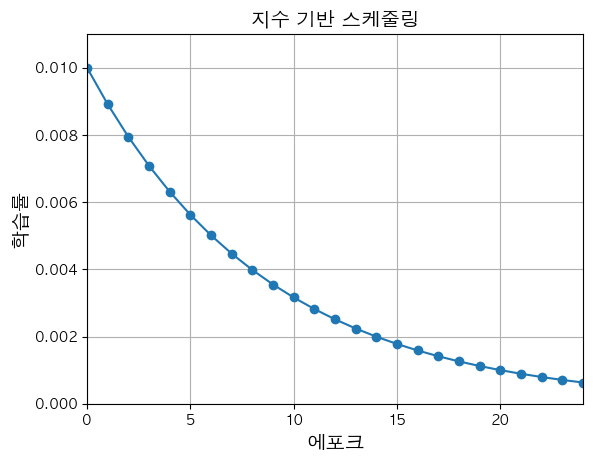

In [83]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("에포크")
plt.ylabel("학습률")
plt.title("지수 기반 스케줄링", fontsize=14)
plt.grid(True)
plt.show()

In [84]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1 ** (1 / 20)

In [85]:
K = tf.keras.backend

class ExponentialDecay(tf.keras.callbacks.Callback):
    def __init__(self, n_steps=40_000):
        super().__init__()
        self.n_steps = n_steps

    def on_batch_begin(self, batch, logs=None):
        lr = K.get_value(self.model.optimizer.learning_rate)
        new_learning_rate = lr * 0.1 ** (1 / self.n_steps)
        K.set_value(self.model.optimizer.learning_rate, new_learning_rate)

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs["ls"] = K.get_value(self.model.optimizer.learning_rate)

In [87]:
lr0 = 0.01
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

n_epochs = 25
batchz_size = 32
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
exp_decay = ExponentialDecay(n_steps)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
   7/1719 [..............................] - ETA: 14s - loss: 3.0453 - accuracy: 0.0982 

2023-11-20 09:20:47.532927: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1719/1719 [==============================] - 12s 7ms/step - loss: 0.7198 - accuracy: 0.7445 - val_loss: 0.5211 - val_accuracy: 0.8160 - ls: 0.0091
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5221 - accuracy: 0.8162 - val_loss: 0.5042 - val_accuracy: 0.8182 - ls: 0.0083
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4881 - accuracy: 0.8285 - val_loss: 0.4786 - val_accuracy: 0.8322 - ls: 0.0076
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4791 - accuracy: 0.8333 - val_loss: 0.4565 - val_accuracy: 0.8384 - ls: 0.0069
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4857 - accuracy: 0.8330 - val_loss: 0.4833 - val_accuracy: 0.8250 - ls: 0.0063
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5541 - accuracy: 0.8200 - val_loss: 0.5861 - val_accuracy: 0.8128 - ls: 0.0058
Epoch 7/25
1719/1719 [==============================] - 10s 6ms

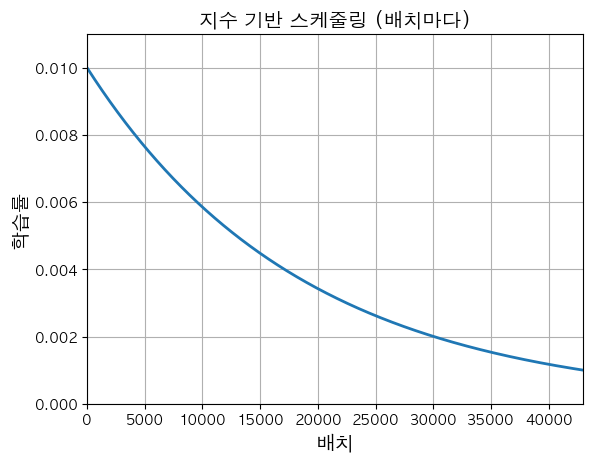

In [88]:
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
steps = np.arange(n_steps)
decay_rate = 0.1
lrs = lr0 * decay_rate ** (steps / n_steps)

plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("배치")
plt.ylabel("학습률")
plt.title("지수 기반 스케줄링 (배치마다)", fontsize=14)
plt.grid(True)
plt.show()

In [89]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [90]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[(boundaries > epoch).argmax() -1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [91]:
n_epochs = 25

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = build_model()
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 44s 25ms/step - loss: 4485.5088 - accuracy: 0.6085 - val_loss: 28338.2402 - val_accuracy: 0.6170 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 42s 25ms/step - loss: 127322.8125 - accuracy: 0.6494 - val_loss: 236670.1562 - val_accuracy: 0.6612 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 41s 24ms/step - loss: 598716.0625 - accuracy: 0.6406 - val_loss: 529588.0625 - val_accuracy: 0.6958 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 42s 24ms/step - loss: 1554588.0000 - accuracy: 0.6363 - val_loss: 2760549.7500 - val_accuracy: 0.6164 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 39s 23ms/step - loss: 3187375.2500 - accuracy: 0.6279 - val_loss: 9407159.0000 - val_accuracy: 0.5362 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 40s 23ms/step - loss: 2009389.1250 - accuracy: 0.6912 - val_loss: 2190659.5000 - val_accuracy: 0.7

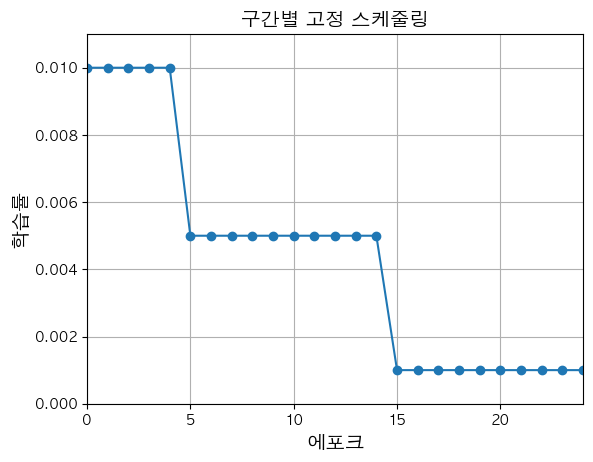

In [92]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs -1, 0, 0.011])
plt.xlabel("에포크")
plt.ylabel("학습률")
plt.title("구간별 고정 스케줄링", fontsize=14)
plt.grid(True)
plt.show()

In [95]:
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
   5/1719 [..............................] - ETA: 21s - loss: 2.9766 - accuracy: 0.1750 

2023-11-20 09:49:30.162124: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.7443 - accuracy: 0.7336 - val_loss: 0.5375 - val_accuracy: 0.8154 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 9s 6ms/step - loss: 0.5256 - accuracy: 0.8163 - val_loss: 0.5140 - val_accuracy: 0.8164 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4900 - accuracy: 0.8275 - val_loss: 0.4852 - val_accuracy: 0.8344 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4844 - accuracy: 0.8302 - val_loss: 0.4531 - val_accuracy: 0.8402 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5209 - accuracy: 0.8230 - val_loss: 0.5377 - val_accuracy: 0.8208 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7279 - accuracy: 0.8025 - val_loss: 2.6267 - val_accuracy: 0.7132 - lr: 0.0100
Epoch 7/25
1719/1719 [==============================] - 10s 6ms/st

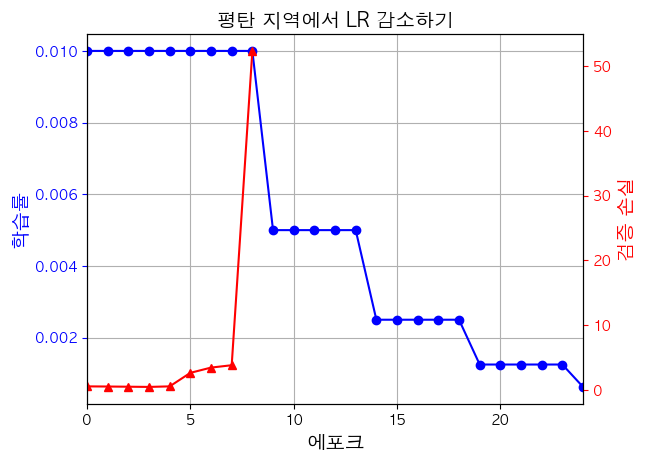

In [97]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("에포크")
plt.ylabel("학습률", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs -1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('검증 손실', color='r')
ax2.tick_params('y', colors='r')

plt.title("평탄 지역에서 LR 감소하기", fontsize=14)
plt.show()

In [98]:
scheduler_learning_rate = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001]
)

In [99]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate,
                    self.model.optimizer.learning_rate * self.factor)

In [107]:
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4, max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [109]:
def plot_lr_vr_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("학습률")
    plt.ylabel("손실")
    plt.grid()

In [104]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

430/430 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.3263


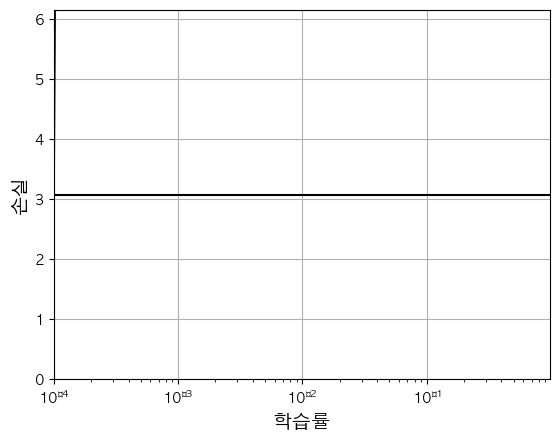

In [110]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vr_loss(rates, losses)

In [111]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_itertion = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iterations - iter1) / (iter2 - iter1) + lr1
    
    def on_batch_begin(self, batch, logs):
        if self.iterations < self.half_itertion:
            lr = self._interpolate(0, self.half_itertion, self.start_lr, self.max_lr)
        elif self.iteration < 2 * self.half_itertion:
            lr = self._interpolate(self.half_itertion, 2 * self.half_itertion,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_itertion, self.iterations,
                                   self.start_lr, self.last_lr)

        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)

In [112]:
model = build_model()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs,
                             max_lr=0.1)
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
  7/430 [..............................] - ETA: 3s - loss: 7.5342 - accuracy: 0.0859  

2023-11-20 10:30:46.918728: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


430/430 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.0989 - val_loss: nan - val_accuracy: 0.1042
Epoch 2/25
430/430 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 3/25
430/430 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 4/25
430/430 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 5/25
430/430 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 6/25
430/430 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 7/25
430/430 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 8/25
430/430 [==============================] - 3s 6m

In [113]:
layer = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [114]:
tf.random.set_seed(42)

In [115]:
from functools import partial

RegulariedDense = partial(tf.keras.layers.Dense,
                          activation="relu",
                          kernel_initializer="he_normal",
                          kernel_regularizer=tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegulariedDense(100),
    RegulariedDense(100),
    RegulariedDense(10, activation="softmax")
])

In [116]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2


2023-11-20 10:34:31.446750: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1719/1719 [==============================] - 30s 17ms/step - loss: 3.1266 - accuracy: 0.7581 - val_loss: 1.8506 - val_accuracy: 0.8188
Epoch 2/2
1719/1719 [==============================] - 29s 17ms/step - loss: 1.4187 - accuracy: 0.8102 - val_loss: 1.1206 - val_accuracy: 0.8130


In [117]:
tf.random.set_seed(42)

In [120]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [121]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10


2023-11-20 10:37:44.672177: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1719/1719 [==============================] - 12s 7ms/step - loss: 1.0921 - accuracy: 0.7100 - val_loss: 0.8140 - val_accuracy: 0.7922
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 29.1428 - accuracy: 0.6897 - val_loss: 3529.5747 - val_accuracy: 0.2696
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: nan - accuracy: 0.1004 - val_loss: nan - val_accuracy: 0.1042
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1042
Epoch 8/10
1719/1719 [

In [122]:
model.evaluate(X_train, y_train)

1719/1719 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.0996


[nan, 0.09961818158626556]

In [123]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

In [124]:
tf.random.set_seed(42)  # 추가 코드 - 재현성을 위한

In [125]:
y_probas = np.stack([model(X_test, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [126]:
model.predict(X_test[:1].round(3))

1/1 [==============================] - 0s 415ms/step


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [127]:
y_proba[0].round(3)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [128]:
y_std = y_proba.std(axis=0)
y_std[0].round(3)

nan

In [132]:
y_std = y_proba.std(axis=0)
y_std[0]

nan

In [133]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

0.1

In [134]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)

In [135]:
# 추가 코드 - 시퀀셜 모델에서 Dropout을 MCDropout으로 변환하는 방법을 보여줍니다.
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [136]:
mc_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 mc_dropout (MCDropout)      (None, 784)               0         
                                                                 
 dense_96 (Dense)            (None, 100)               78500     
                                                                 
 mc_dropout_1 (MCDropout)    (None, 100)               0         
                                                                 
 dense_97 (Dense)            (None, 100)               10100     
                                                                 
 mc_dropout_2 (MCDropout)    (None, 100)               0         
                                                                 
 dense_98 (Dense)            (None, 10)              

In [137]:
# 추가 코드 - 모델을 재훈련하지 않고 사용하는 방법을 보여줍니다.
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1])
         for sample in range(100)], axis=0).round(2)

1/1 [==============================] - 0s 10ms/step


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [138]:
dense = tf.keras.layers.Dense(
    100, activation="relu", kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.))

In [139]:
# 추가 코드 - 모델의 모든 은닉층에 맥스-노름을 적용하는 방법을 보여줍니다.
MaxNormDense = partial(tf.keras.layers.Dense,
                       activation="relu", kernel_initializer="he_normal",
                       kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation="softmax")
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10


2023-11-20 10:50:17.510075: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1719/1719 [==============================] - 11s 6ms/step - loss: 0.5961 - accuracy: 0.7872 - val_loss: 0.5718 - val_accuracy: 0.7978
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7094 - accuracy: 0.7866 - val_loss: 0.8731 - val_accuracy: 0.7498
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 1.3053 - accuracy: 0.7465 - val_loss: 1.9534 - val_accuracy: 0.6814
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2.5674 - accuracy: 0.7148 - val_loss: 2.8381 - val_accuracy: 0.7098
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 4.8112 - accuracy: 0.6861 - val_loss: 7.2100 - val_accuracy: 0.6800
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 7.9567 - accuracy: 0.6667 - val_loss: 17.9584 - val_accuracy: 0.6196
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 17.8588 - accuracy: 0.6158 - val_loss: 27.1086 - val_accuracy: 

In [141]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))

In [142]:
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [143]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [144]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

170498071/170498071 [==============================] - 13s 0us/step


In [145]:
X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_vaild = X_train_full[:5000]

In [148]:
model_path = Path(os.getcwd()).resolve().joinpath("my_cift_model")
model_path.mkdir(exist_ok=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkout_cb = tf.keras.callbacks.ModelCheckpoint("my_cift10_model", save_best_only=True)

model_log_path = model_path.joinpath("logs")
model_log_path.mkdir(exist_ok=True)

run_index = 1
run_logdir = model_log_path.joinpath(f"run_{run_index:03d}")
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkout_cb, tensorboard_cb]

In [149]:
%load_ext tensorboard
%tensorboard --logdir=model_log_path

In [150]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - ETA: 0s - loss: 4.4272 - accuracy: 0.1564INFO:tensorflow:Assets written to: my_cift10_model/assets


INFO:tensorflow:Assets written to: my_cift10_model/assets


1407/1407 [==============================] - 170s 116ms/step - loss: 4.4272 - accuracy: 0.1564 - val_loss: 2.7542 - val_accuracy: 0.1086
Epoch 2/100
1407/1407 [==============================] - 162s 115ms/step - loss: 2.0975 - accuracy: 0.2290 - val_loss: 2.8891 - val_accuracy: 0.0986
Epoch 3/100
1407/1407 [==============================] - 159s 113ms/step - loss: 1.9807 - accuracy: 0.2711 - val_loss: 3.0415 - val_accuracy: 0.0998
Epoch 4/100
1407/1407 [==============================] - 159s 113ms/step - loss: 1.8930 - accuracy: 0.3069 - val_loss: 2.9766 - val_accuracy: 0.0922
Epoch 5/100
1407/1407 [==============================] - 158s 113ms/step - loss: 1.8191 - accuracy: 0.3407 - val_loss: 3.1357 - val_accuracy: 0.1004
Epoch 6/100
1407/1407 [==============================] - 157s 111ms/step - loss: 1.7679 - accuracy: 0.3620 - val_loss: 3.1280 - val_accuracy: 0.1028
Epoch 7/100
1407/1407 [==============================] - 157s 112ms/step - loss: 1.7239 - accuracy: 0.3758 - val_loss:

In [151]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 7ms/step - loss: 2.7542 - accuracy: 0.1086


[2.7541909217834473, 0.10859999805688858]

In [152]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model_path = Path(os.getcwd()).resolve().joinpath("my_cifar10_bn_model")
model_path.mkdir(exist_ok=True)

model_log_path = model_path.joinpath("logs")
model_log_path.mkdir(exist_ok=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkout_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_bn_model", save_best_only=True)

run_index = 1
run_logdir = model_log_path.joinpath(f"run_bn_{run_index:03d}")
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkout_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_vaild), callbacks=callbacks)
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - ETA: 0s - loss: 2.0389 - accuracy: 0.2462

2023-11-20 12:13:31.116620: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7694214352655507187


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/r1/lzjj2s794s7b78859vzpkpd40000gn/T/ipykernel_74991/3512472312.py", line 29, in <module>

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 1856, in fit

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 1919, in test_step

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/r1/lzjj2s794s7b78859vzpkpd40000gn/T/ipykernel_74991/3512472312.py", line 29, in <module>

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 1856, in fit

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 1919, in test_step

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/Users/kjs/miniconda3/envs/handson/lib/python3.11/site-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

2 root error(s) found.
  (0) INVALID_ARGUMENT:  logits and labels must have the same first dimension, got logits shape [32,10] and labels shape [98304]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]
	 [[ArgMax/_11]]
  (1) INVALID_ARGUMENT:  logits and labels must have the same first dimension, got logits shape [32,10] and labels shape [98304]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_2497566]

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

model_path = Path(os.getcwd()).resolve().joinpath("my_cifar10_selu_model")
model_path.mkdir(exist_ok=True)

model_log_path = model_path.joinpath("logs")
model_log_path.mkdir(exist_ok=True)


early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_selu_model", save_best_only=True)
run_index = 1 # 모델을 훈련할 때마다 증가합니다.
run_logdir = model_log_path.joinpath(f"run_selu_{run_index:03d}")
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid_scaled, y_valid)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

model_path = Path(os.getcwd()).resolve().joinpath("my_cifar10_alpha_dropout_model")
model_path.mkdir(exist_ok=True)

model_log_path = model_path.joinpath("logs")
model_log_path.mkdir(exist_ok=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_alpha_dropout_model", save_best_only=True)

run_index = 1 # 모델을 훈련할 때마다 증가합니다.
run_logdir = model_log_path.joinpath(f"run_alpha_dropout_{run_index:03d}")
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid_scaled, y_valid)

In [ ]:
class MCAlphaDropout(tf.keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [ ]:
mc_model = tf.keras.Sequential([
    (
        MCAlphaDropout(layer.rate)
        if isinstance(layer, tf.keras.layers.AlphaDropout)
        else layer
    )
    for layer in model.layers
])

In [ ]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return Y_probas.argmax(axis=1)

In [ ]:
tf.random.set_seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = (y_pred == y_valid[:, 0]).mean()
accuracy

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
# 지수 부분의 음수 표시를 위해
# https://jehyunlee.github.io/2020/02/13/Python-DS-2-matplotlib_defaults_and_fonts/
plt.xticks(fontname="Liberation Sans")

batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
n_epochs = 15
n_iterations = math.ceil(len(X_train_scaled) / batch_size) * n_epochs
onecycle = OneCycleScheduler(n_iterations, max_lr=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])